In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
from drift import Drift
from intervals import createDriftIntervals

ECG = pd.read_csv('/Users/akanksha/Desktop/DriftGen/driftgen/MBA_ECG805_data.out')
max_length = 20000

[(250.0, 45829.8), (46329.8, 91909.6), (92409.6, 137989.40000000002), (138489.40000000002, 184069.2), (184569.2, 230149.0)]


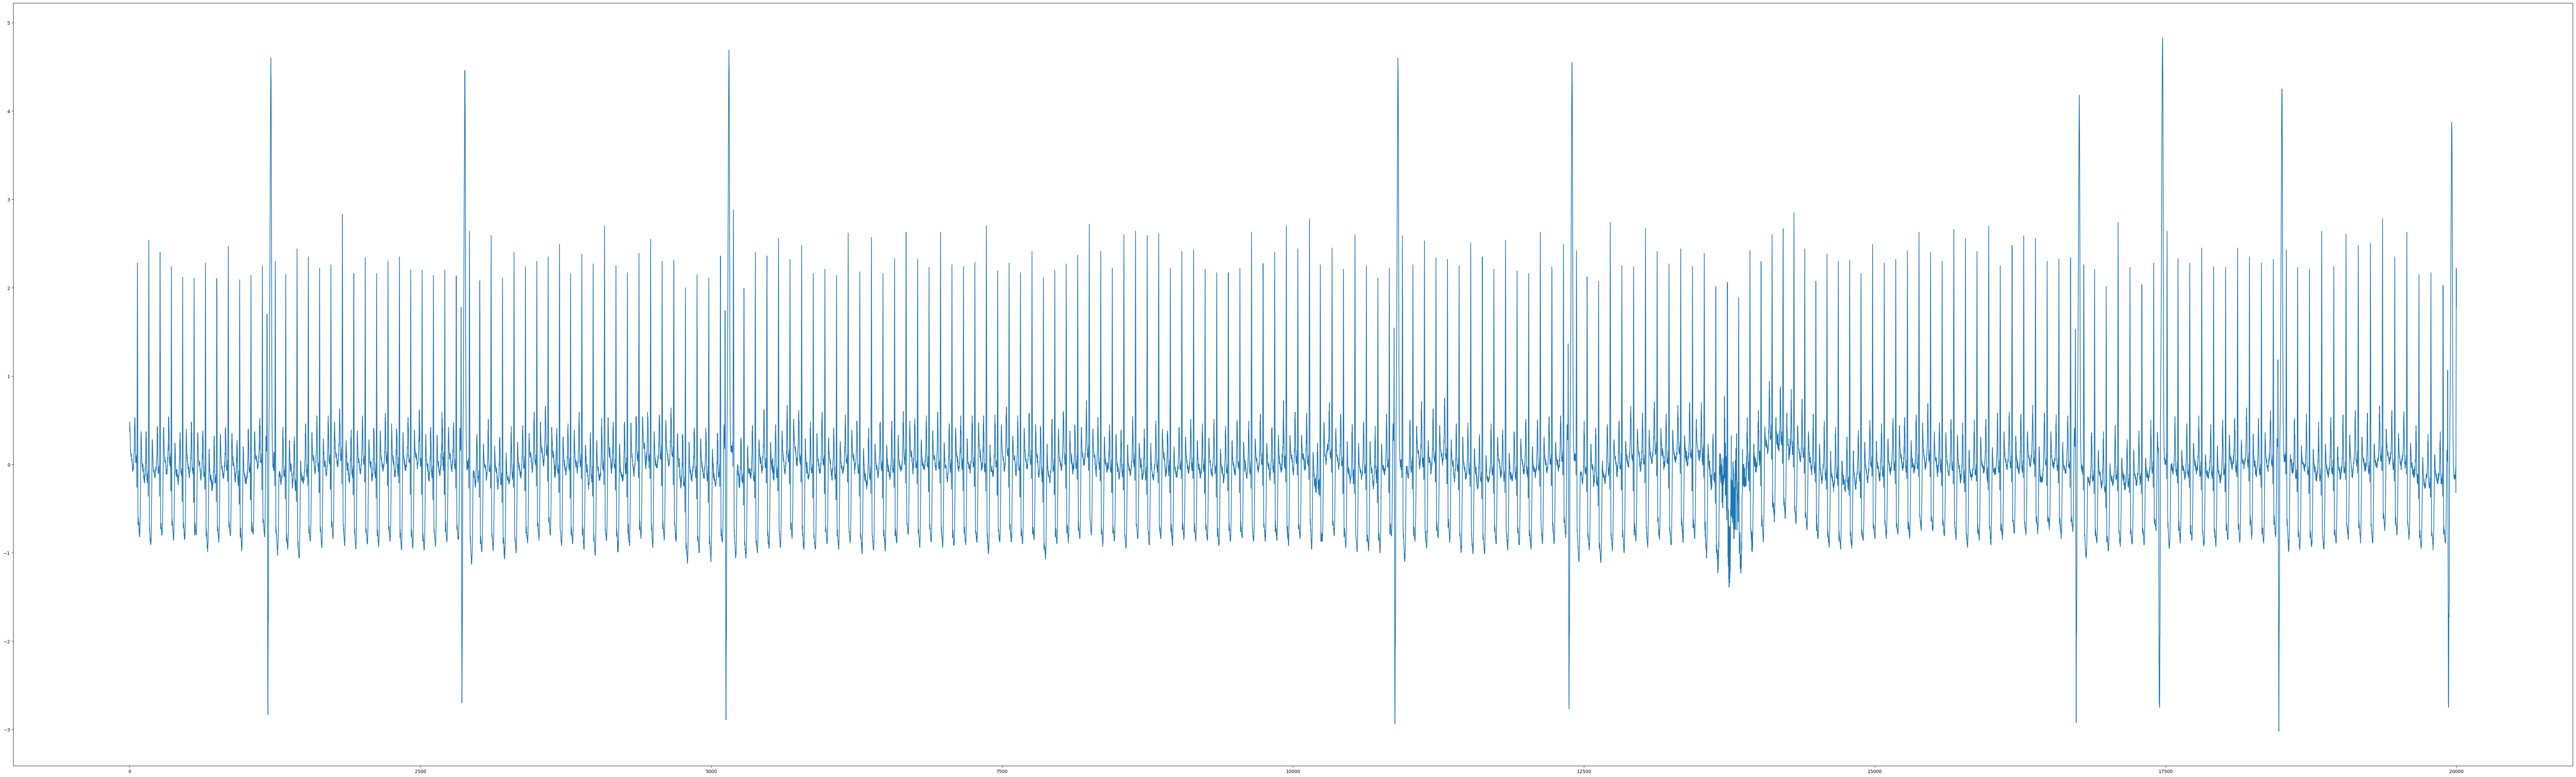

In [3]:
# injecting one concept drift to test function
drift_addition_1 = createDriftIntervals(ECG.iloc[0:max_length, :])

#drift_addition_1.inject_drift(185819,228899,'mean', 10, transition_period=0)


plt.figure(figsize=(100,30))
plt.plot(drift_addition_1.dataset.iloc[:,0])

[(1000.0, 3000.0), (5000.0, 7000.0), (9000.0, 11000.0), (13000.0, 15000.0), (17000.0, 19000.0)]


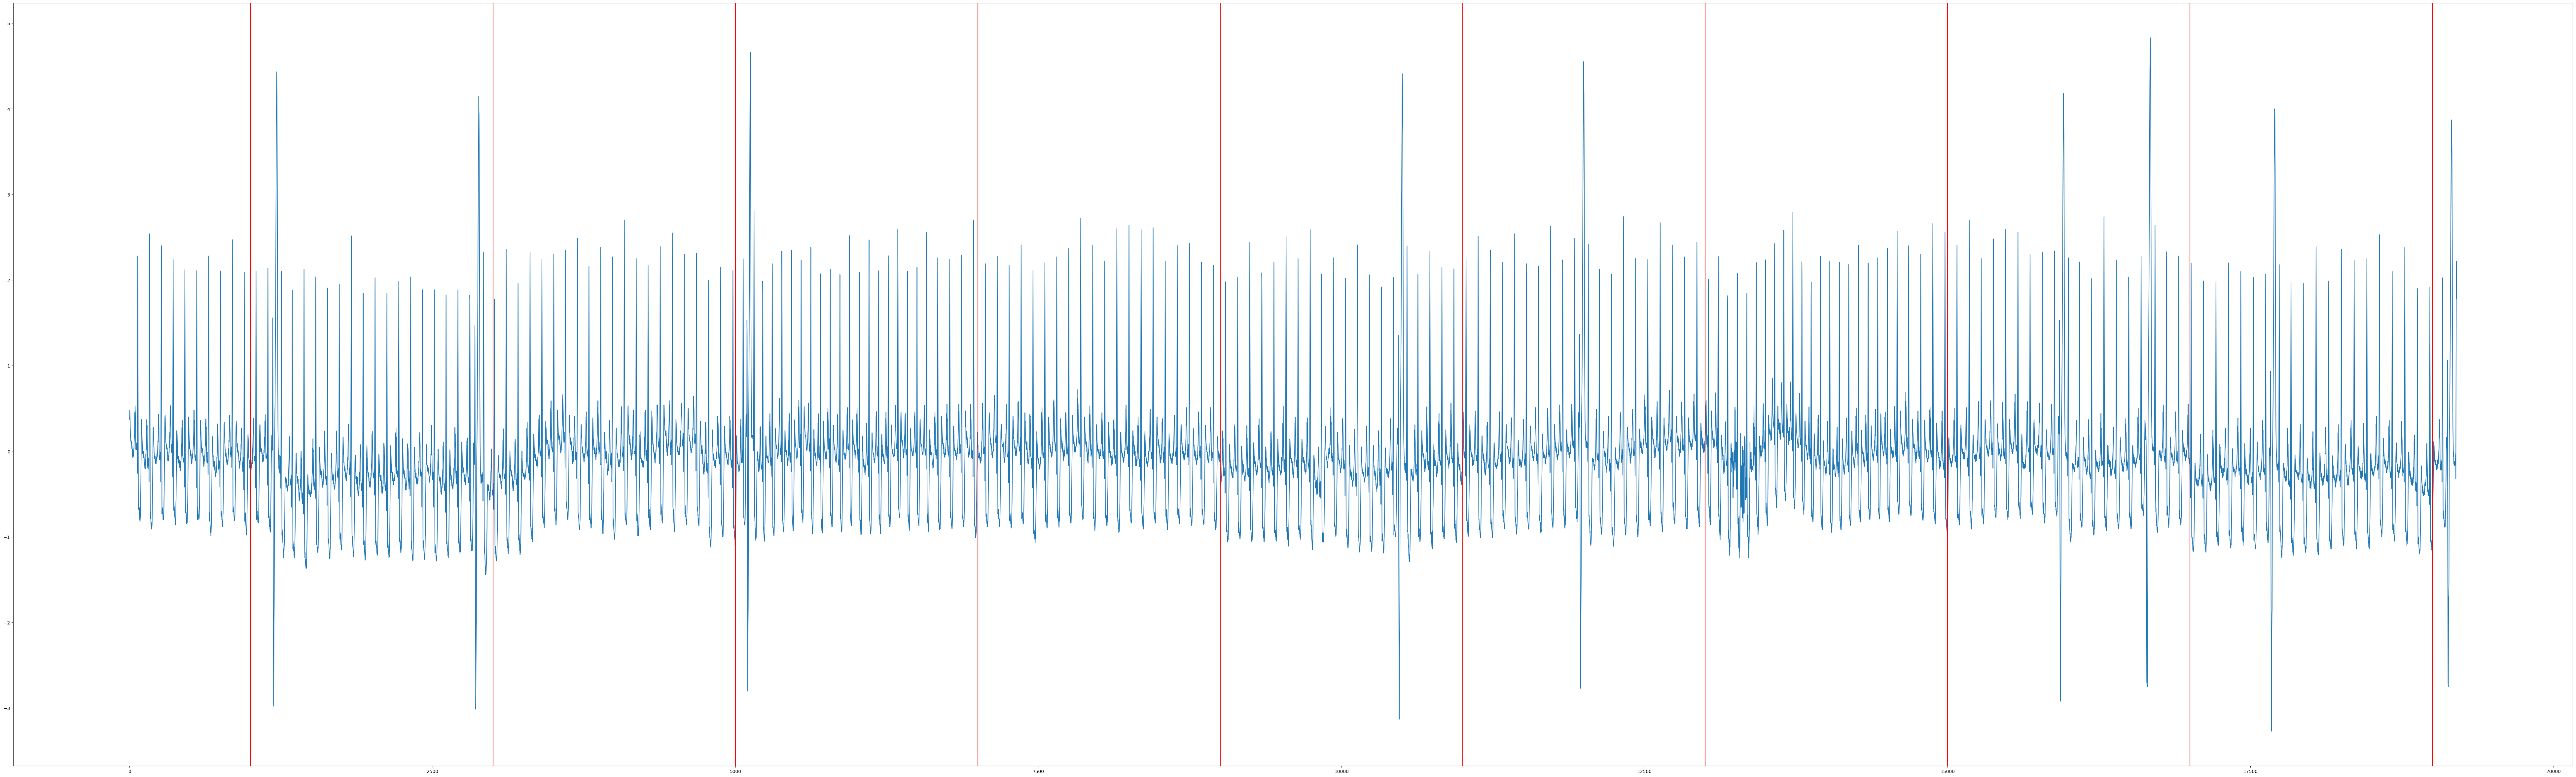

In [4]:
# creating 3 drift modules, one for each interval
meandrift1 = Drift('mean', 10, transition_period=0.2) # drift module 1
distdrift1 = Drift('dist', 0.5, transition_period=0) # drift module 2
meandrift2 = Drift('mean', -13, transition_period=0) # drift module 3

drift_addition_1.create_intervals(5,2000)
# add drift modules here corresponding to intervals
drift_addition_1.add_drifts(meandrift1, distdrift1, meandrift2, distdrift1, meandrift2)

plt.figure(figsize=(100,30))
plt.plot(drift_addition_1.dataset.iloc[:, 0])
for point in drift_addition_1.points:
    plt.axvline(x = point[0], color = 'r',)
    plt.axvline(x = point[1], color = 'r',)
plt.show()